<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session4/Assignment4D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

MaxPooling,Dropout 1*1,Batch Normalization,ModelCheckpoint Learning rate

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.utils import np_utils

from keras.callbacks import EarlyStopping

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


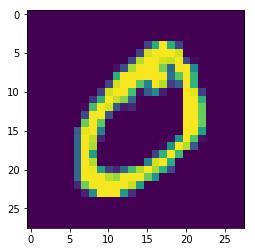

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(8,(3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(Conv2D(16,(3, 3), activation='relu')) #24


model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))#12
#model.add(Conv2D(8,(1, 1), activation='relu'))#12  


model.add(Conv2D(16,(3,3), activation='relu')) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(16, (3, 3), activation='relu')) #8


model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))#4
#model.add(Conv2D(8,(1, 1), activation='relu'))#4


model.add(Conv2D(16,(3,3), activation='relu')) #2
model.add(Conv2D(10,(2,2)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_34 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
batch_normalization_35 (Batc (None, 10, 10, 16)        64        
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch):
  if (epoch <= 3 ):
   return 0.003
  elif(epoch <=6):
   return 0.002
  elif(epoch <=10):
   return 0.001
  elif(epoch <=15):
   return 0.0005 
  elif(epoch <=20):
   return 0.000025
  elif(epoch <=25):
   return 0.0000125
  else: 
   return round(0.001 * 1/(1 + 0.319 * epoch), 10)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [0]:
#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1,patience=15)
lr1=LearningRateScheduler(scheduler, verbose=1)


In [0]:

model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, verbose=1,validation_split=0.1, callbacks=[lr1])

#model.fit(X_train, Y_train,batch_size=128,nb_epoch=50,verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 54000 samples, validate on 6000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
54000/54000 [==============================] - 9s 161us/step - loss: 0.0344 - acc: 0.9883 - val_loss: 0.0348 - val_acc: 0.9892
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
54000/54000 [==============================] - 3s 47us/step - loss: 0.0293 - acc: 0.9902 - val_loss: 0.0338 - val_acc: 0.9895
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
54000/54000 [==============================] - 2s 46us/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0367 - val_acc: 0.9888
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.003.
54000/54000 [==============================] - 2s 46us/step - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0668 - val_acc: 0.9822
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.002.
54000/54000 [==============================] - 2s 4

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 80us/step


In [0]:
print(score)

[0.021402368047478013, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.2330921e-10 1.6829890e-07 2.9373732e-06 4.0671084e-06 2.3929209e-10
  3.4004379e-09 5.0569916e-13 9.9998987e-01 5.2399280e-09 3.0046776e-06]
 [1.2467420e-04 1.1939030e-03 9.9867475e-01 1.8673611e-06 1.4696450e-07
  1.0329929e-08 2.6735604e-06 1.1442475e-07 1.7693718e-06 8.6729113e-09]
 [8.2577235e-06 9.9989450e-01 3.3504261e-06 1.3496718e-07 3.1784744e-05
  9.1442814e-07 3.4361587e-06 4.1803134e-05 2.0487112e-06 1.3809961e-05]
 [9.9942565e-01 1.0384804e-09 1.6973331e-07 3.2969288e-10 3.0516063e-09
  1.8280265e-07 5.7191000e-04 3.6937628e-08 2.9569259e-07 1.9036743e-06]
 [6.9256645e-12 2.9452565e-09 4.4330722e-10 3.6236581e-14 9.9993932e-01
  1.8528783e-10 2.2520183e-08 1.0472373e-09 2.0098855e-07 6.0503909e-05]
 [4.3436157e-06 9.9990487e-01 7.3396239e-07 7.9438545e-09 1.0106908e-05
  6.1682428e-08 1.4064507e-06 7.4266791e-05 6.4691568e-07 3.6023166e-06]
 [3.0855225e-14 1.2200229e-06 5.9173577e-10 3.9635244e-13 9.9995053e-01
  1.8632315e-08 2.9018388e-10 1.9804284e-08 6.6644918e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

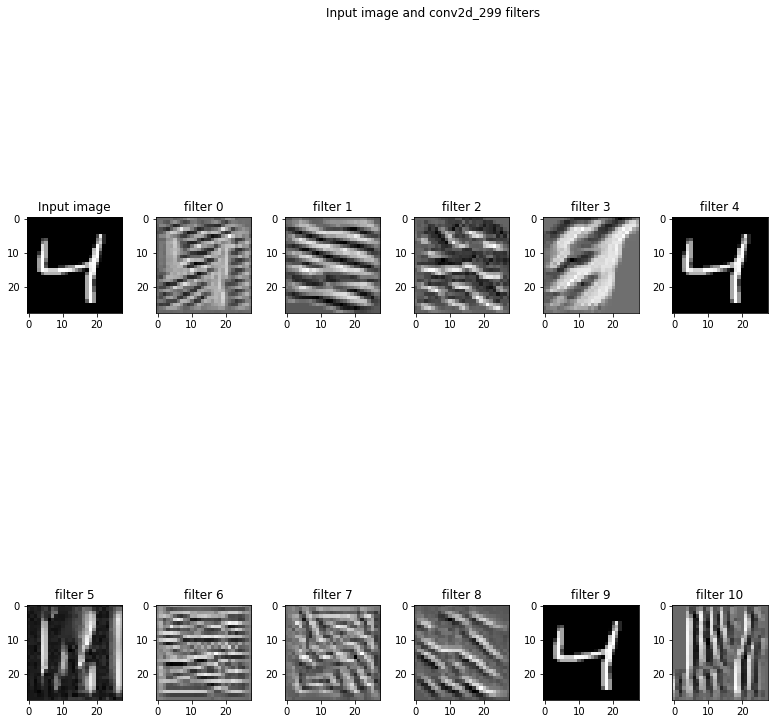

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_299'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()